# Break Through Tech - Allstate Team 1b
## Author: Minh Le
---

This file is used to perform exploratory data analysis from the dataset given by the client (Allstate). The end goal will be explore all the important features as well as understand the data more before working on the modeling part of the project.

### 1. Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/claims_data.csv')
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


### 2. Quick Data Overview

In [4]:
print("Shape:", df.shape)
print("-----------------------")
print("Data types:\n", df.dtypes.value_counts())
print("-----------------------")
print("Missing values:", df.isnull().sum().sort_values(ascending=False).sum())

Shape: (188318, 132)
-----------------------
Data types:
 object     116
float64     15
int64        1
Name: count, dtype: int64
-----------------------
Missing values: 0


Note:
- There are 116 categorical variables and 15 continuous variables
- There is no missing value

In [5]:
# Separate columns by cat and con
id_col = "id"
target_col = "loss"
categorical_cols = [c for c in df.columns if c.startswith("cat")]
continuous_cols = [c for c in df.columns if c.startswith("cont")]

### 3. Target Variable

The target variable in the data is `loss`, which is what we're trying to predict.

Target Summary:
 count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64


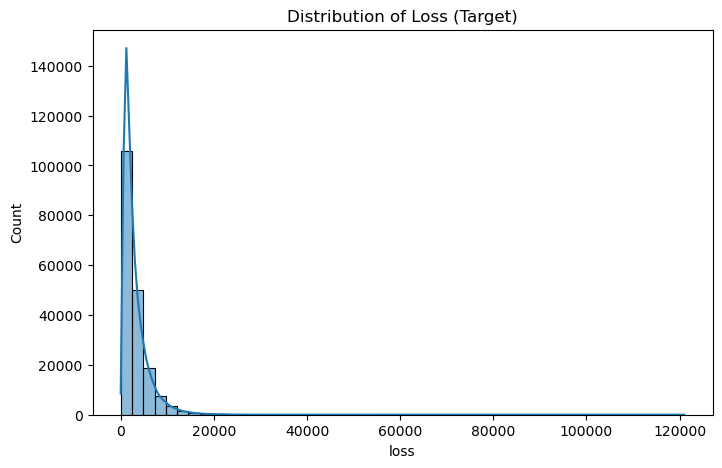

In [6]:
print("Target Summary:\n", df[target_col].describe())

plt.figure(figsize=(8,5))
sns.histplot(df[target_col], bins=50, kde=True)
plt.title("Distribution of Loss (Target)")
plt.show()

### 4. Continuous Variables

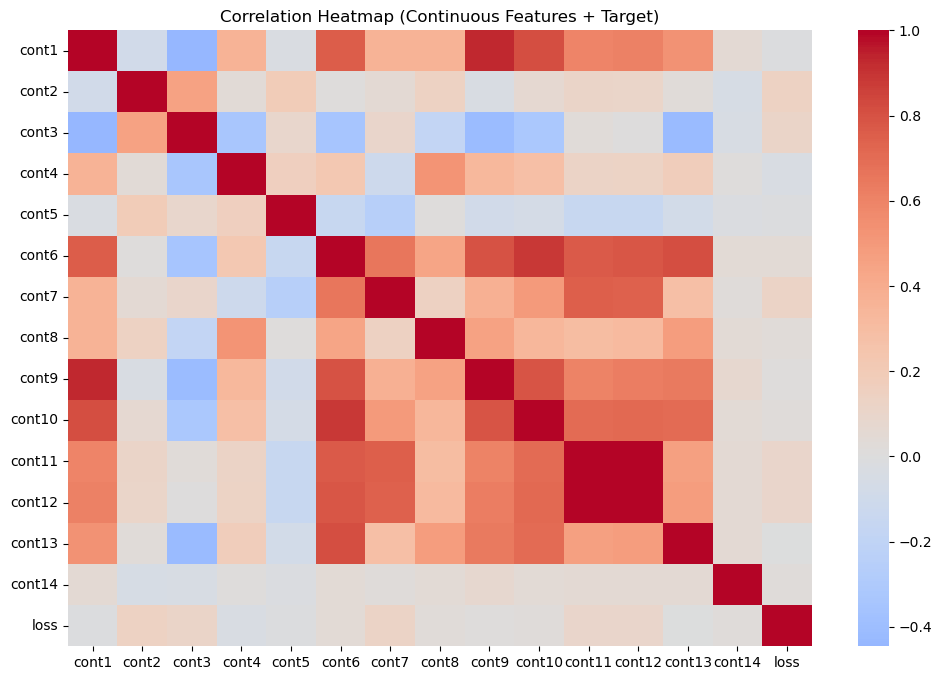

In [7]:
# Correlation matrix
plt.figure(figsize=(12,8))
corr = df[continuous_cols + [target_col]].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Continuous Features + Target)")
plt.show()

In [8]:
# Compute correlation matrix
corr_matrix = df[continuous_cols + [target_col]].corr()

# Set a threshold for "high correlation"
threshold = 0.6  

# Extract pairs with high correlation (absolute value)
high_corr = (
    corr_matrix.unstack()
    .reset_index()
    .rename(columns={"level_0":"Feature1", "level_1":"Feature2", 0:"Correlation"})
)

# Remove duplicates and self-correlations
high_corr = high_corr[
    (high_corr["Feature1"] < high_corr["Feature2"]) & 
    (abs(high_corr["Correlation"]) >= threshold)
].sort_values(by="Correlation", ascending=False)

high_corr

,Feature1,Feature2,Correlation
161,cont11,cont12,0.994384
8,cont1,cont9,0.929912
140,cont10,cont6,0.883351
185,cont13,cont6,0.815091
9,cont1,cont10,0.808551
83,cont6,cont9,0.797544
143,cont10,cont9,0.785697
170,cont12,cont6,0.785144
155,cont11,cont6,0.773745
5,cont1,cont6,0.758315


### 5. Categorical Variables

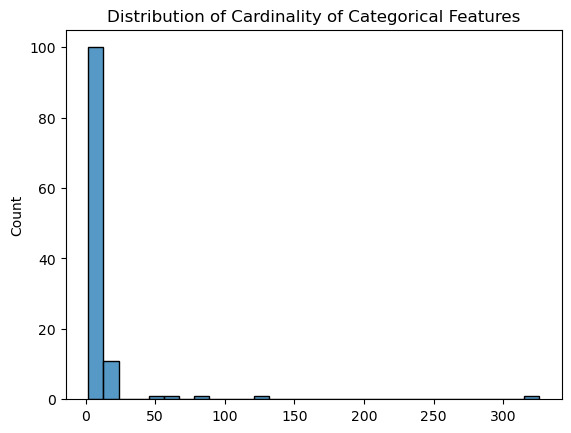

In [22]:
cat_cardinality = df[categorical_cols].nunique().sort_values()
sns.histplot(cat_cardinality, bins=30, kde=False)
plt.title("Distribution of Cardinality of Categorical Features")
plt.show()

In [26]:
summary = pd.DataFrame({
    "Column": categorical_cols,
    "Unique Values": [df[c].nunique() for c in categorical_cols],
    "Most Frequent Value": [df[c].mode()[0] for c in categorical_cols],
    "Frequency": [df[c].value_counts().iloc[0] for c in categorical_cols],
    "Percentage": [df[c].value_counts(normalize=True).iloc[0]*100 for c in categorical_cols]
}).sort_values("Unique Values")

In [ ]:
# summary.to_excel('summary_categorical_var.xlsx', index=False)

In [36]:
summary.groupby('Unique Values').agg({"Column":'count'})

,Column
Unique Values,
2,72
3,4
4,12
5,3
7,4
8,3
9,1
11,1
13,1
